In [33]:
import os
home_path="/media/DATA_18_TB_1/awaghili/WESTPA_CG/harmonic_mix_trpcage_2d/westpa_prop"
os.chdir(home_path)


In [34]:
import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [35]:
all_pcoords = []

# skip_iters_until = 30
skip_iters_until = 0

file_path = "west.h5"
with h5py.File(file_path, 'r') as h5_file:
    for iname, ival in h5_file["iterations"].items():
        iteration_index = int(iname.split("_")[-1])
        if iteration_index < skip_iters_until:
            print(iname)
            continue
#         iteration_pcoords = ival["pcoord"][:]
#         iteration_pcoords = [arr[..., 0] for arr in ival["pcoord"]]
#         print(iteration_pcoords)
#         # We only want to include completed segments
#         finished_mask = ival["seg_index"]["status"] == 2
#         all_pcoords.extend(iteration_pcoords[finished_mask])
        iteration_pcoords = ival["pcoord"][:, :, 0]  # Extract first component
        finished_mask = ival["seg_index"]["status"] == 2
        all_pcoords.extend(iteration_pcoords[finished_mask])


all_pcoords = [i.flatten() for i in all_pcoords]

In [36]:
# component_values = [[i[0], i[-1]] for i in all_pcoords]
component_values = [i for i in all_pcoords]

print(np.array(component_values))

for i in component_values:
    print(i)

num_bins = 80
component_min = min([min(i) for i in component_values])
component_max = max([max(i) for i in component_values])
component_bins = np.linspace(component_min, component_max, num_bins+1)
# Calculate the binds ourselves because I can't figure out np.digitize tonight - Daniel
# The np.clip call is needed because math here treats the bins as open ranges on the right [a,b), so the max value gets put in next bin
binned_componenents = [np.clip((num_bins*(i-component_min)/(component_max-component_min)).astype(int), None, num_bins-1) for i in component_values]

for i,j in zip(binned_componenents, component_values):
     bad = i[i >= num_bins]
     if len(bad):
          print(bad)
          print(j > component_max)

transition_matrix = np.zeros((num_bins, num_bins), dtype=int)
for i in binned_componenents:
    for j in range(len(i) - 1):
        try:
            #transition_matrix[from_state][to_state]
            transition_matrix[i[j]][i[j+1]] += 1
        except:
            print(j, j+1)
            raise

[[0.8309826  0.9171826  1.0397826  ... 1.1619827  1.0705826  1.1250826 ]
 [0.8309826  0.89298266 0.96718264 ... 1.1357826  1.0761826  1.0544827 ]
 [0.8309826  0.86128265 0.93498266 ... 0.99538267 0.94858265 0.90838265]
 ...
 [1.2831059  1.3151059  1.2505059  ... 1.1973062  1.1436062  1.2332058 ]
 [1.3212061  1.3150058  1.302906   ... 1.3265061  1.303906   1.260006  ]
 [1.2377062  1.240006   1.2410059  ... 1.312706   1.2782059  1.2873058 ]]
[0.8309826 0.9171826 1.0397826 1.0953827 1.0901827 1.1301826 1.1654826
 1.1405826 1.1619827 1.0705826 1.1250826]
[0.8309826  0.89298266 0.96718264 1.0271826  1.0533826  1.0496826
 1.0576826  1.0899826  1.1357826  1.0761826  1.0544827 ]
[0.8309826  0.86128265 0.93498266 0.92728263 0.9361826  0.93318266
 0.92478263 0.9429826  0.99538267 0.94858265 0.90838265]
[0.8309826 0.8977826 0.9375826 1.0057826 1.0509826 1.0891826 1.1315826
 1.2169826 1.2363826 1.2358826 1.2612827]
[0.8309826  0.8089826  0.9401826  0.86918265 0.8607826  0.87428266
 0.87638265 0.91

[0.6062641  0.6211641  0.53096414 0.55126417 0.50866413 0.46066415
 0.41506422 0.40756416 0.37866414 0.33856416 0.33286417]
[0.7089641  0.7408643  0.7137642  0.65246415 0.62946415 0.67676425
 0.7092643  0.70486426 0.6776643  0.7167642  0.67746425]
[0.4539641  0.47726417 0.55566406 0.5557642  0.5112642  0.5005642
 0.52606416 0.47616422 0.4673642  0.4695642  0.36436415]
[0.71356416 0.6599641  0.5928643  0.6134641  0.65766406 0.68066406
 0.7469642  0.7533641  0.7487643  0.7291641  0.7878642 ]
[0.7412641  0.7146642  0.7166641  0.7367642  0.7021642  0.6698642
 0.6168642  0.60236406 0.66316414 0.7264643  0.7758641 ]
[0.4415642  0.49646413 0.45916414 0.46486413 0.4882642  0.44886422
 0.42236412 0.5176642  0.57936406 0.5491642  0.5042641 ]
[0.56686425 0.5522642  0.65316415 0.68046427 0.66376424 0.66466427
 0.63536406 0.69786406 0.7367642  0.7779641  0.78986406]
[0.7785642  0.75086427 0.7570641  0.7649641  0.7672641  0.7796643
 0.82916427 0.7978642  0.82796407 0.81036425 0.84846425]
[0.7785642 

[0.3284762  0.3716762  0.3263762  0.2715764  0.27137637 0.28707623
 0.2408762  0.20297623 0.1939764  0.0992763  0.10237622]
[0.26137638 0.29897618 0.3054762  0.26617622 0.22337627 0.19307637
 0.20317626 0.18827629 0.14897633 0.12017632 0.1250763 ]
[0.31217623 0.26537633 0.23187637 0.18897629 0.21817636 0.1723764
 0.15897632 0.18407631 0.24487638 0.29147625 0.2852764 ]
[0.26137638 0.31077623 0.33247638 0.2867763  0.25047636 0.22517633
 0.2011764  0.18917632 0.19057631 0.2630763  0.22717619]
[0.3263762  0.31497622 0.3822763  0.3787763  0.3440764  0.31357622
 0.22387624 0.09527636 0.13417625 0.22587633 0.2243762 ]
[0.16637635 0.11757636 0.07527637 0.08317637 0.0993762  0.04057622
 0.07887626 0.14337635 0.12207627 0.1007762  0.11977625]
[0.32007623 0.30157638 0.27007627 0.23377633 0.22387624 0.21167636
 0.20517635 0.21237636 0.19587636 0.24647641 0.25227618]
[0.29847622 0.25347638 0.27597642 0.29587626 0.2645762  0.30427623
 0.23637629 0.17557621 0.05967641 0.10527635 0.12587619]
[0.313676

[1.2401674 1.2807674 1.2315674 1.2580674 1.1790674 1.2050674 1.1588676
 1.1561675 1.1591675 1.0394676 1.0540674]
[1.2268674 1.2457676 1.2339675 1.2504675 1.3243675 1.3123674 1.3287675
 1.3090675 1.3112674 1.2523675 1.1940675]
[1.3012674 1.2267675 1.1600676 1.2532675 1.2902675 1.2818675 1.3030674
 1.3175676 1.2627676 1.2739675 1.2505674]
[1.3574674 1.3324676 1.3249674 1.3082676 1.3720675 1.3030674 1.3609674
 1.3666675 1.3582675 1.3726676 1.3971674]
[1.2252674 1.1863675 1.2128675 1.2474675 1.2704675 1.2631674 1.2013674
 1.2572675 1.3077674 1.3259676 1.2475674]
[1.3337674 1.3434675 1.3557675 1.3104675 1.3246675 1.3451674 1.3329675
 1.3097675 1.3013675 1.2519674 1.2329674]
[1.2592676 1.1869674 1.2424674 1.2259674 1.2978675 1.3458674 1.2996676
 1.2871675 1.2615676 1.2473674 1.2343674]
[1.2181675 1.1387675 1.1946676 1.2187674 1.2086675 1.1826675 1.1880674
 1.2192674 1.1976674 1.1935675 1.2069676]
[1.3191674 1.3185675 1.2808676 1.2571676 1.2478676 1.2371676 1.2148676
 1.2072675 1.2087674 1.18

[0.9650309  0.944031   0.9055309  0.82633114 0.7775309  0.8444309
 0.8872311  0.9292309  0.936131   0.93763113 0.88163114]
[0.9650309  0.95303106 0.9450309  0.97953105 0.9395311  0.93003106
 0.977031   0.997731   0.9780309  0.9488311  0.9497311 ]
[0.9650309  0.94873095 0.900831   0.794631   0.71793103 0.68223095
 0.66193104 0.650831   0.72243094 0.7994311  0.8207309 ]
[0.9650309  0.948231   0.892931   0.809531   0.7306311  0.71893096
 0.73953104 0.731431   0.781631   0.767931   0.65923095]
[0.85863113 0.86243105 0.7943311  0.85533094 0.8707311  0.8331311
 0.8535311  0.81923103 0.7989311  0.7980311  0.8015311 ]
[0.83373094 0.9044311  0.91283107 0.880831   0.848531   0.782531
 0.777931   0.708231   0.62473106 0.67643094 0.69073105]
[0.83373094 0.908031   0.93083096 0.94433093 0.95963097 0.89703107
 0.852231   0.84213114 0.8365309  0.8870311  0.88833094]
[0.83373094 0.92063093 0.9583311  0.93733096 0.86753106 0.7880311
 0.7390311  0.71383095 0.683831   0.6509311  0.64193106]
[0.83373094 0

[0.3076198  0.3142197  0.30561972 0.33951974 0.35351992 0.28491974
 0.26351976 0.24481988 0.23641992 0.16151977 0.06241989]
[0.23741984 0.21751976 0.1854198  0.2169199  0.2826197  0.17911983
 0.1393199  0.13391972 0.21611977 0.26131988 0.37341976]
[0.28181982 0.26531982 0.12961984 0.06801987 0.02491975 0.09331989
 0.1939199  0.23841977 0.22681975 0.18061972 0.09371972]
[0.23741984 0.17471981 0.10071993 0.14231992 0.23741984 0.21481991
 0.27051973 0.30131984 0.2840197  0.29561973 0.3089199 ]
[0.23741984 0.1906197  0.1308198  0.18681979 0.2241199  0.21511984
 0.1229198  0.13111973 0.15991974 0.20161986 0.17151976]
[0.15881991 0.16661978 0.16611981 0.20811987 0.21111989 0.17941976
 0.1676197  0.1360197  0.17571974 0.15711975 0.13451982]
[0.3472197  0.2926197  0.2990198  0.31391978 0.2688198  0.23101974
 0.2931199  0.19941974 0.17111993 0.22831988 0.1755197 ]
[0.3472197  0.3327198  0.38061976 0.34741974 0.32131982 0.39951992
 0.41431975 0.33951974 0.3853197  0.50541973 0.40941978]
[0.15881

[1.2076554 1.2055554 1.2112556 1.2156556 1.2358556 1.2710555 1.2309556
 1.2519555 1.2183554 1.1793556 1.1948555]
[1.2781556 1.2966554 1.2996554 1.3377554 1.3241556 1.3473556 1.3505554
 1.3133554 1.3124554 1.2876556 1.2739556]
[1.2582555 1.2693555 1.3378556 1.3477554 1.2902555 1.2266555 1.2234554
 1.2750554 1.2717555 1.3170555 1.3401556]
[1.2969556 1.2549555 1.2638555 1.2412555 1.2510555 1.2111554 1.2464554
 1.2776556 1.3182554 1.3096554 1.3310554]
[1.3580556 1.3330555 1.2993555 1.2939556 1.2652555 1.2168555 1.2194555
 1.2091556 1.2150555 1.2633555 1.2920556]
[1.3080554 1.3197556 1.3115556 1.3266554 1.3034556 1.3231554 1.3325555
 1.3226554 1.2770555 1.2994554 1.2506554]
[1.2305555 1.2211554 1.2035556 1.2406554 1.2370555 1.2306554 1.2952554
 1.2702556 1.3078556 1.2384555 1.2111554]
[1.3986554 1.3431556 1.4091556 1.3737555 1.3855555 1.3672554 1.3310554
 1.3393555 1.3631556 1.3754556 1.4333556]
[1.2087555 1.2038555 1.1361556 1.0481555 1.0180554 1.0479555 1.1302555
 1.2128556 1.2350554 1.26

[0.51360464 0.5921047  0.6421046  0.5765047  0.62940454 0.68320465
 0.6247046  0.5889046  0.5313046  0.5178046  0.54370475]
[0.75780463 0.7146046  0.74120474 0.74920464 0.63500476 0.61920476
 0.6841047  0.7181046  0.71540475 0.77380466 0.77230453]
[0.4931047  0.51720476 0.5677047  0.55550456 0.5960047  0.5829046
 0.5656047  0.5671046  0.58130455 0.5369046  0.49780464]
[0.52160454 0.53880477 0.54390454 0.5622046  0.4925046  0.4509046
 0.44050455 0.40720463 0.40130472 0.40540457 0.43110466]
[0.5650046  0.53930473 0.53670454 0.52870464 0.51280475 0.49230456
 0.4378047  0.39940476 0.39820457 0.46420455 0.4896047 ]
[0.52160454 0.5401046  0.55830455 0.54760456 0.5025046  0.47580457
 0.43400455 0.4186046  0.38950467 0.29760456 0.3366046 ]
[0.46390462 0.45700455 0.4114046  0.46890473 0.4478047  0.49840474
 0.48220468 0.49300456 0.49990463 0.44330454 0.3452046 ]
[0.6274047  0.6232047  0.60570455 0.61360455 0.6490047  0.5880046
 0.6277046  0.5807047  0.5830047  0.6153047  0.57400465]
[0.6274047 

[0.53044987 0.54265    0.60214996 0.5113499  0.63154984 0.69114995
 0.66065    0.51364994 0.42015004 0.31034994 0.27754998]
[0.45435    0.43904996 0.35445    0.35485005 0.32694983 0.34434986
 0.34504986 0.29725003 0.37054992 0.44214988 0.44554996]
[0.66855    0.6533499  0.61594987 0.63995004 0.63304996 0.62975
 0.5341499  0.48915005 0.5608499  0.62654996 0.61695004]
[0.79305005 0.9021499  0.9142499  0.86305    0.8756499  0.81894994
 0.8131499  0.85885    0.85214996 0.8487499  0.8324499 ]
[0.51444983 0.5048499  0.5427499  0.58914995 0.56684995 0.6096499
 0.63975    0.61205006 0.60294986 0.63695    0.5996499 ]
[0.71645    0.76725006 0.78615    0.78084993 0.73055005 0.68415
 0.69945    0.71435    0.75294995 0.7388499  0.75804996]
[0.69634986 0.63785005 0.56955004 0.56044984 0.62724996 0.64454985
 0.61654997 0.55904984 0.5657499  0.58865    0.58634996]
[0.59364986 0.5982499  0.5973499  0.5873499  0.58395004 0.62144995
 0.68774986 0.6756499  0.58134985 0.5076499  0.5013499 ]
[0.4035499  0.4

[1.3705308 1.3314307 1.3289309 1.3203309 1.3470309 1.3944309 1.4283307
 1.406431  1.3818309 1.3828309 1.2869308]
[1.2607307 1.1752307 1.2309308 1.2519307 1.2267308 1.2853308 1.2928307
 1.2889309 1.2686307 1.2759309 1.1996307]
[1.2813308 1.2954307 1.3178308 1.3378308 1.3478308 1.4084308 1.4134309
 1.418031  1.4233305 1.4284308 1.4458306]
[1.4554307 1.3825309 1.2820308 1.2650309 1.2890308 1.2835307 1.2193308
 1.1951308 1.2229307 1.2101307 1.2316308]
[1.3661306 1.3527308 1.3116307 1.3224308 1.2803307 1.3183308 1.2945309
 1.2953308 1.3492308 1.3876307 1.3234308]
[1.3716309 1.3403308 1.402931  1.4207308 1.3812306 1.3756306 1.3944309
 1.413831  1.4204309 1.4534309 1.433831 ]
[1.3020308 1.3240309 1.3033307 1.2979307 1.2951307 1.2753308 1.4019306
 1.4442308 1.4116309 1.3833306 1.3495307]
[1.3697307 1.3777306 1.3517308 1.3820307 1.3751309 1.3486307 1.412431
 1.4260309 1.4105308 1.4382308 1.401531 ]
[1.2562308 1.2638307 1.2762308 1.2621307 1.2462308 1.2411308 1.2767308
 1.2725308 1.3039308 1.308

[0.01142931 0.05422926 0.1299293  0.13022923 0.19282937 0.29662943
 0.3115294  0.35742927 0.38562942 0.45252943 0.5006294 ]
[0.19112945 0.31552935 0.30692935 0.28292942 0.32052922 0.29192924
 0.33742929 0.31212926 0.32862926 0.2930293  0.4358294 ]
[0.25792933 0.25852942 0.2477293  0.27492929 0.20252943 0.18892932
 0.13322926 0.08622932 0.10442924 0.11252928 0.20592928]
[0.25792933 0.2555294  0.21072936 0.23012924 0.17132926 0.15842938
 0.18162942 0.14012933 0.16512942 0.19812942 0.20352936]
[0.25792933 0.26512933 0.2721293  0.29322934 0.25532937 0.26262927
 0.17452931 0.16412926 0.10492945 0.10502934 0.07372928]
[0.25792933 0.25662923 0.22872925 0.24092937 0.1083293  0.16962934
 0.18172932 0.12762928 0.08852935 0.06762934 0.09382939]
[0.25792933 0.23812938 0.21412945 0.23582935 0.15852928 0.18672943
 0.14352942 0.14142942 0.15692925 0.18252945 0.14012933]
[0.33352923 0.36302924 0.3583293  0.35732937 0.38082933 0.39172935
 0.40442944 0.45122933 0.46552944 0.5263293  0.51082945]
[0.33352

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[-0.582999   -0.53529906 -0.55019903 -0.545099   -0.5015991  -0.4756992
 -0.468899   -0.457299   -0.36769915 -0.40949917 -0.3221991 ]
[-0.582999   -0.5238991  -0.49699903 -0.524899   -0.541399   -0.493299
 -0.4513991  -0.35419917 -0.23259902 -0.23229909 -0.30039907]
[-0.582999   -0.56449914 -0.5491991  -0.560699   -0.6201991  -0.6311991
 -0.6648991  -0.76139915 -0.76659906 -0.8113991  -0.85549915]
[-0.582999   -0.56039906 -0.58339906 -0.6113992  -0.63949907 -0.60989904
 -0.598999   -0.56539917 -0.6232991  -0.60409904 -0.6338991 ]
[-0.5542991  -0.5677991  -0.6201991  -0.57389903 -0.4701991  -0.46279907
 -0.45959902 -0.36659908 -0.2459991  -0.29149914 -0.3571992 ]
[-0.54589915 -0.65579915 -0.611099   -0.5568991  -0.512799   -0.52949905
 -0.54589915 -0.5467992  -0.51879907 -0.437299   -0.48989916]
[-0.513999   -0.575099   -0.6454991  -0.6151991  -0.6282991  -0.61719906
 -0.70029914 -0.7259991  -0.5928991  -0.5988991  -0.45749903]
[-0.54589915 -0.64519906 -0.62629914 -0.64449906 -0.548499

[-0.506444   -0.50174403 -0.58434415 -0.6069441  -0.6054442  -0.627944
 -0.66124415 -0.7005441  -0.668344   -0.7160442  -0.753644  ]
[-0.506444  -0.5062442 -0.5594442 -0.636744  -0.6415441 -0.668144
 -0.6758442 -0.7081442 -0.6522441 -0.674144  -0.637244 ]
[-0.506444   -0.51814413 -0.5725441  -0.62174416 -0.6392441  -0.63464403
 -0.6679442  -0.7901442  -0.9063442  -0.898144   -0.940644  ]
[-0.5855441  -0.56994414 -0.5759442  -0.53274417 -0.53904414 -0.55064416
 -0.529644   -0.68354416 -0.6206441  -0.6192441  -0.66634417]
[-0.5855441  -0.58064413 -0.58224416 -0.5027442  -0.58304405 -0.63684416
 -0.71304417 -0.76024413 -0.804744   -0.7082441  -0.7880442 ]
[-0.5855441  -0.606344   -0.61314416 -0.5121441  -0.5766442  -0.615844
 -0.66924405 -0.74754405 -0.76404405 -0.82064414 -0.82794404]
[-0.5855441  -0.57994413 -0.5711441  -0.49794412 -0.54774404 -0.671844
 -0.7837441  -0.9122441  -0.92574406 -1.0262442  -1.2024441 ]
[-0.5855441  -0.5817442  -0.556144   -0.42714405 -0.5394442  -0.5538442
 

[-0.57280827 -0.51450825 -0.42390823 -0.42890835 -0.48190832 -0.47670817
 -0.5089083  -0.4854083  -0.5150082  -0.54090834 -0.57150817]
[-0.50860834 -0.46870828 -0.56900835 -0.51730824 -0.5343082  -0.5365083
 -0.6276083  -0.6183083  -0.57150817 -0.4768083  -0.51300836]
[-0.4120083  -0.3985083  -0.35240817 -0.34760833 -0.3409083  -0.3027084
 -0.2936082  -0.26100826 -0.26590824 -0.2051084  -0.2822082 ]
[-0.4120083  -0.40300822 -0.36790824 -0.38720822 -0.32930827 -0.33730817
 -0.2848084  -0.3416083  -0.32700825 -0.34690833 -0.44990826]
[-0.4120083  -0.40660834 -0.38380837 -0.40700817 -0.40950823 -0.3597083
 -0.3827083  -0.41400838 -0.36490822 -0.35700822 -0.39840817]
[-0.4120083  -0.40380836 -0.33730817 -0.34050822 -0.26930833 -0.21910834
 -0.15670824 -0.14750838 -0.12060833 -0.08340836 -0.07580829]
[-0.4120083  -0.3863082  -0.3598082  -0.36430836 -0.2821083  -0.22350836
 -0.19720817 -0.1828084  -0.18340826 -0.13370824 -0.14830828]
[-0.4718082  -0.5544083  -0.5801084  -0.5975082  -0.548108

[1.0065424  0.98184276 1.0840423  1.0861423  1.0763423  1.0599425
 1.1382425  1.1245425  1.1227424  1.0805423  1.0856426 ]
[1.1412427 1.0915425 1.0917428 1.1178424 1.1360424 1.1420424 1.1236427
 1.0992424 1.1210425 1.1386425 1.1201427]
[1.1412427 1.0839427 1.0774424 1.0597427 1.0255425 1.1325424 1.1434424
 1.2189424 1.2166426 1.1718423 1.1705425]
[1.0527427  0.98084235 0.93654275 0.93964267 0.9382427  0.96204257
 0.9703424  0.9682424  0.97824264 1.0051425  0.99504256]
[1.1793425 1.1171424 1.1418426 1.1038425 1.1028426 1.1350424 1.1332424
 1.1089427 1.0584424 1.0564425 1.0876424]
[1.0527427  0.9608424  0.9593427  0.98344254 1.0359423  1.0185425
 1.0739424  1.1268427  1.1168425  1.1112425  1.0752428 ]
[1.1344426 1.1620424 1.1651423 1.1527426 1.1287425 1.1620424 1.1276424
 1.1554425 1.1434424 1.1258423 1.1951425]
[1.1257427 1.1550424 1.1694424 1.2173426 1.2193425 1.2505424 1.2810423
 1.2965424 1.2794425 1.1977427 1.1181424]
[1.1229427 1.1278427 1.1280425 1.1444423 1.1626427 1.1882427 1.19

[0.66689014 0.67679    0.70209    0.6426902  0.6226902  0.5999901
 0.5478902  0.54049015 0.5901902  0.52679014 0.49089003]
[0.63379    0.60429    0.66629004 0.6441901  0.6392901  0.6556902
 0.7058902  0.6793902  0.69979    0.75159    0.7821901 ]
[0.63379    0.6118901  0.64659    0.6703901  0.6845901  0.6751902
 0.6751902  0.74439    0.78189015 0.78049016 0.7233901 ]
[0.63379    0.62389016 0.6793902  0.69909    0.67259    0.70139
 0.74349    0.7821901  0.79569006 0.7809901  0.78299   ]
[0.6480901  0.64799    0.6636901  0.6148901  0.60889006 0.6599901
 0.6463902  0.6306901  0.65449    0.6578901  0.68789005]
[0.70909    0.60799    0.5609901  0.5883901  0.6103902  0.6198902
 0.63399005 0.66399    0.64869    0.52689004 0.55249   ]
[0.69919014 0.7388902  0.71419    0.7460902  0.7349901  0.70329
 0.7649901  0.7987902  0.86639    0.92399    0.9596901 ]
[0.66309    0.65449    0.6624901  0.6587901  0.71289015 0.7119901
 0.7144902  0.7167902  0.75099015 0.69979    0.71559   ]
[0.7361901  0.69049 

[0.2590468  0.27814698 0.28624678 0.24164677 0.23704696 0.15144682
 0.18244696 0.18664694 0.11644697 0.13634682 0.17764688]
[0.2590468  0.2841468  0.30374694 0.24874687 0.25944686 0.20464683
 0.23954678 0.17714691 0.2496469  0.308347   0.29954696]
[0.2590468  0.29834676 0.34054685 0.31524682 0.2826469  0.22264695
 0.20974684 0.22264695 0.17304683 0.20924687 0.25874686]
[0.31744695 0.28394675 0.23804688 0.23364687 0.17314696 0.21424699
 0.22864676 0.19354677 0.15044689 0.20554686 0.18324685]
[ 0.0234468  -0.01215315 -0.09695315 -0.05055308 -0.02105308 -0.03455305
 -0.04325318 -0.07675314 -0.04255319 -0.08995318 -0.02005315]
[0.13664699 0.13474679 0.16174698 0.09594679 0.08184695 0.09034681
 0.09044695 0.05214691 0.06514692 0.09204698 0.04364681]
[ 0.07394695  0.04954696 -0.08275318 -0.16245317 -0.30745316 -0.340353
 -0.3070531  -0.24755311 -0.16645312 -0.10835314 -0.15645313]
[0.11364698 0.13624692 0.1477468  0.17674685 0.17724681 0.15974689
 0.11444688 0.13874698 0.15134692 0.19384694 

[-0.04468226 -0.02638221 -0.0126822   0.01941776 -0.01498222 -0.02758217
 -0.03918219  0.01461768  0.03721786  0.11141777  0.16851783]
[-0.39568233 -0.38808227 -0.3934822  -0.39378238 -0.4442823  -0.43398237
 -0.4508822  -0.42808223 -0.38208222 -0.38798237 -0.38528228]
[-0.26718235 -0.2591822  -0.21778226 -0.30398226 -0.35908222 -0.33998227
 -0.27438235 -0.24378228 -0.26078224 -0.27808237 -0.33758235]
[-0.39988232 -0.3285823  -0.33208227 -0.3429823  -0.30158234 -0.17048216
 -0.19348216 -0.20388222 -0.19748235 -0.20248222 -0.24568224]
[-0.3632822  -0.2969823  -0.24658227 -0.25378227 -0.2654822  -0.31888223
 -0.2834823  -0.3041823  -0.2835822  -0.32528234 -0.3041823 ]
[-0.36758232 -0.3841822  -0.47798228 -0.51718235 -0.5318823  -0.5181823
 -0.5239823  -0.46188235 -0.47758222 -0.45838237 -0.4436822 ]
[-0.07938218 -0.04698229 -0.08388233 -0.05968237 -0.08458233 -0.02028227
 -0.11108232 -0.13618231 -0.10168219 -0.11788225 -0.1519823 ]
[-0.3653822  -0.3968823  -0.43408227 -0.40958238 -0.4132

[0.3417971  0.30469704 0.39179707 0.50439715 0.5777972  0.61219716
 0.6635971  0.66179705 0.6468971  0.57189703 0.5131972 ]
[0.39029717 0.4420972  0.39889717 0.36979723 0.34999704 0.26599717
 0.23499703 0.21999717 0.27789712 0.30099726 0.35129714]
[0.39029717 0.40949726 0.3623972  0.33779716 0.30149722 0.30939722
 0.36359715 0.41319704 0.38699722 0.35199714 0.39379716]
[0.39029717 0.44399714 0.4221971  0.40209723 0.34549713 0.32119703
 0.27679706 0.24609709 0.26599717 0.36369705 0.4808972 ]
[0.39029717 0.46179724 0.42899704 0.45179725 0.48199725 0.33819723
 0.19219708 0.21389723 0.23109722 0.3043971  0.3358972 ]
[0.37349725 0.30319715 0.29439712 0.29939723 0.33349705 0.36279726
 0.31689715 0.31179714 0.36329722 0.40369725 0.4221971 ]
[0.3517971  0.30549717 0.27909708 0.32999706 0.36399722 0.33399725
 0.2675972  0.25379705 0.35539722 0.43509722 0.45139718]
[0.3393972  0.36329722 0.34409714 0.3221972  0.35059714 0.35189724
 0.34199715 0.23889709 0.24369717 0.19679713 0.17239714]
[0.35179

[-0.07569623 -0.07859612 -0.13219619 -0.1437962  -0.13289618 -0.03269601
  0.10510397  0.20080376  0.15700388  0.18500376  0.19000387]
[-0.07569623 -0.09419608 -0.10289621 -0.10319614 -0.07289624  0.02330399
  0.07370377  0.08700395  0.02840376  0.07090378  0.18430376]
[-0.05499601 -0.01789618  0.07940388  0.12370396  0.24160385  0.27960396
  0.39050388  0.33090377  0.28170395  0.27400398  0.19630384]
[-0.05499601  0.01810384  0.09470391  0.14760399  0.15160394  0.13750386
  0.3015039   0.2153039   0.15100384  0.19700384  0.25740385]
[-0.05499601 -0.01499605  0.05060387  0.09970379  0.14260387  0.17550397
  0.2476039   0.28040385  0.22570395  0.0509038   0.01010394]
[-0.05499601  0.00190377  0.04780388  0.00370383  0.10110378  0.10210395
  0.18470383  0.20400381  0.25180387  0.30370378  0.23270392]
[0.25640392 0.38790393 0.37380385 0.3541038  0.34460378 0.405504
 0.4546039  0.47860384 0.48750377 0.52830386 0.54530406]
[0.33530378 0.38880396 0.36810398 0.31400394 0.334404   0.3898039
 0

[-1.0373671 -1.031467  -1.007067  -1.0522671 -1.060667  -1.0233669
 -1.0150671 -1.0538671 -1.0584669 -1.0598669 -1.042367 ]
[-1.0373671 -1.0547669 -1.039767  -1.099767  -1.113967  -1.058367
 -1.0445671 -1.0354669 -1.071367  -1.0598669 -1.0278671]
[-1.0373671 -1.0693669 -1.041667  -1.077667  -1.0875671 -1.0666671
 -1.039367  -1.0148671 -1.030767  -1.020767  -1.006767 ]
[-1.0373671  -1.0482671  -1.038867   -1.0972669  -1.084867   -1.022567
 -1.0131669  -1.0247669  -1.0798671  -0.97686696 -0.99906707]
[-1.011867  -1.0212669 -1.0844669 -1.1690669 -1.2099669 -1.242867
 -1.2517669 -1.314867  -1.255867  -1.326967  -1.299767 ]
[-1.085767  -1.144767  -1.142267  -1.1407671 -1.1672671 -1.2002671
 -1.159267  -1.1186671 -1.146467  -1.2106669 -1.2617669]
[-1.0373671 -1.056067  -1.053967  -0.982867  -1.054467  -1.1026671
 -1.069967  -1.092967  -1.1713669 -1.188467  -1.233567 ]
[-1.0310669 -1.0805671 -1.0529671 -1.0478671 -1.054867  -1.0371671
 -1.078867  -1.1135671 -1.0301671 -1.1446669 -1.1144669]
[

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.71238184 0.72038174 0.79188204 0.779582   0.77728176 0.87278175
 0.84118176 0.83838177 0.844882   0.84098196 0.82988214]
[0.71238184 0.73038197 0.7625818  0.79828215 0.7853818  0.7705817
 0.80228186 0.83008194 0.7973819  0.7523818  0.7523818 ]
[0.71238184 0.7315817  0.7738819  0.79798174 0.7360821  0.7572818
 0.79868174 0.796082   0.8355818  0.8349819  0.758482  ]
[0.71238184 0.724782   0.80068207 0.8421817  0.82378197 0.8284817
 0.8384819  0.858582   0.83458185 0.76618195 0.73928213]
[0.68878174 0.74848175 0.73618174 0.75178194 0.76978207 0.7645817
 0.7243819  0.662982   0.6212821  0.6217818  0.6716819 ]
[0.739182   0.7174821  0.73908186 0.76288176 0.73268175 0.69168186
 0.759182   0.7863817  0.7490821  0.7873821  0.84498215]
[0.6737819  0.7424817  0.80558205 0.83528185 0.8040819  0.7745819
 0.728982   0.69358206 0.6137819  0.61358213 0.577682  ]
[0.65558195 0.66568184 0.6660819  0.6691818  0.70488214 0.7257819
 0.75368214 0.7657819  0.7530818  0.7438817  0.7703819 ]
[0.63788176 0.

[-0.6628177  -0.5671177  -0.5528178  -0.5887177  -0.5076177  -0.38931775
 -0.28791785 -0.36611772 -0.32811785 -0.4220178  -0.53281784]
[-0.61501765 -0.6172178  -0.60391784 -0.52151775 -0.50271773 -0.55451775
 -0.5224178  -0.47691774 -0.41931772 -0.39891768 -0.43761778]
[-0.6423178  -0.51801777 -0.5175178  -0.59571767 -0.55101776 -0.5541177
 -0.5140178  -0.4787178  -0.49371767 -0.55591774 -0.4420178 ]
[-0.6662178  -0.7446177  -0.74471784 -0.78671765 -0.76281786 -0.73701787
 -0.7160177  -0.6415179  -0.70831776 -0.6790178  -0.7143178 ]
[-0.6662178  -0.7469177  -0.7198179  -0.7237177  -0.6844177  -0.6304178
 -0.67521787 -0.6309178  -0.63011765 -0.70771766 -0.76161766]
[-0.6969178  -0.75951767 -0.69121766 -0.7225177  -0.7744179  -0.7397177
 -0.79281783 -0.7301178  -0.7243178  -0.6890178  -0.7495177 ]
[-0.6662178  -0.7415178  -0.75771785 -0.8258178  -0.8035178  -0.6958177
 -0.6810179  -0.6408179  -0.7739177  -0.7013178  -0.68981767]
[-0.54011774 -0.49121785 -0.40291786 -0.36261773 -0.3937177

[1.1623111 1.1664109 1.1980109 1.2113109 1.2231112 1.2199111 1.3161111
 1.3015113 1.298511  1.2445111 1.1574111]
[1.2241111 1.1815109 1.1470113 1.1021109 1.0287108 0.9631109 0.9817109
 1.0332112 1.1063108 1.153111  1.1653109]
[1.2241111 1.1871109 1.163311  1.1560111 1.1223111 1.1114111 1.1350112
 1.1495109 1.1986113 1.2302113 1.1937113]
[1.2241111  1.173511   1.1058111  1.0552111  0.998611   0.97921085
 1.0967112  1.1035109  1.1476111  1.1067109  1.168611  ]
[1.2241111 1.1751113 1.1189113 1.0842109 1.0655112 1.0991111 1.1118112
 1.144311  1.1950111 1.1776109 1.155611 ]
[1.2015109 1.2417111 1.2506108 1.2894111 1.2522111 1.3012109 1.3204112
 1.3317113 1.311111  1.2819109 1.2589111]
[1.2015109 1.225111  1.2481112 1.2793112 1.2873111 1.2990112 1.2801108
 1.3359113 1.3328109 1.3091111 1.349011 ]
[1.2015109 1.2248111 1.230411  1.245811  1.2557111 1.2840109 1.2819109
 1.2878113 1.3188109 1.3286109 1.2671113]
[1.2015109 1.2289109 1.2439113 1.2779112 1.292911  1.324511  1.3463111
 1.364511  1.3

[-0.59780955 -0.59210944 -0.5859096  -0.6470096  -0.6864095  -0.67880964
 -0.7232096  -0.7482095  -0.7679095  -0.80040956 -0.87070966]
[-0.59780955 -0.57610965 -0.5657096  -0.6392095  -0.64970946 -0.6856096
 -0.6677096  -0.6857095  -0.6649096  -0.7037096  -0.73860955]
[-0.50290966 -0.4846096  -0.44480968 -0.48040962 -0.5211096  -0.52030945
 -0.5068095  -0.5341096  -0.55600953 -0.5698097  -0.49230957]
[-0.50290966 -0.4796095  -0.42960954 -0.44220948 -0.40650964 -0.38030958
 -0.44700956 -0.60770965 -0.74380946 -0.75590944 -0.7058096 ]
[-0.50290966 -0.4839096  -0.4307096  -0.46420956 -0.48570967 -0.42600965
 -0.49920964 -0.6357095  -0.69630957 -0.7290096  -0.7591095 ]
[-0.50290966 -0.47250962 -0.38690948 -0.38150954 -0.36190963 -0.32570958
 -0.3006096  -0.39070964 -0.49680948 -0.55630946 -0.51810956]
[-0.55820966 -0.52010965 -0.5916095  -0.5232096  -0.5542095  -0.56480956
 -0.5293095  -0.4437096  -0.50990963 -0.59640956 -0.4767096 ]
[-0.5630095  -0.5558095  -0.63810945 -0.58000946 -0.5462

In [37]:
transition_matrix

array([[ 23,  56,  32, ...,   0,   0,   0],
       [ 50, 242, 284, ...,   0,   0,   0],
       [ 39, 265, 641, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 448, 116,   5],
       [  0,   0,   0, ..., 109,  71,  16],
       [  0,   0,   0, ...,   6,  16,   3]])

In [38]:
transition_prob_matrix = transition_matrix.astype(np.double)/np.sum(transition_matrix, axis=1, keepdims=True)
transition_prob_matrix = np.nan_to_num(transition_prob_matrix, nan=0.0)

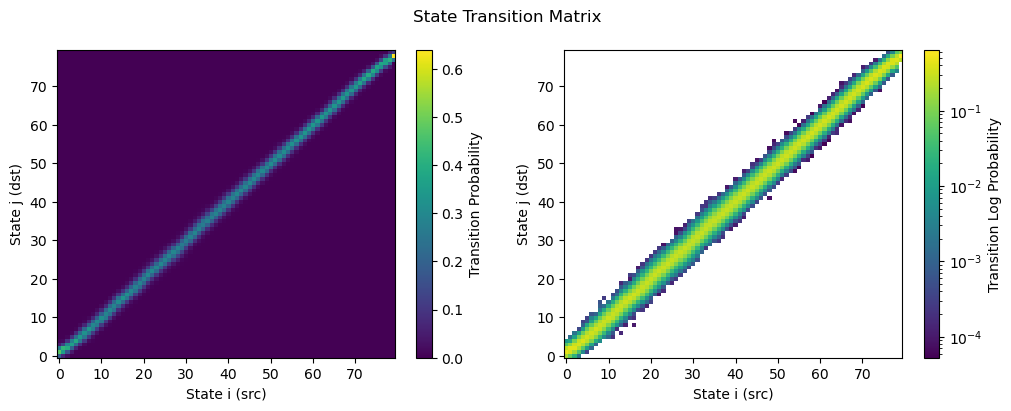

In [39]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
im0 = axes[0].imshow(transition_prob_matrix.T, origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(im0, label='Transition Probability', ax=axes[0])
axes[0].set_xlabel('State i (src)')
axes[0].set_ylabel('State j (dst)')
# axes[0].set_title('Transition Matrix')

im1 = axes[1].imshow(transition_prob_matrix.T, origin='lower', aspect='auto', cmap='viridis', norm="log")
plt.colorbar(im1, label='Transition Log Probability', ax=axes[1])
axes[1].set_xlabel('State i (src)')
axes[1].set_ylabel('State j (dst)')
axes[1].set_title('')

fig.suptitle("State Transition Matrix")
pass

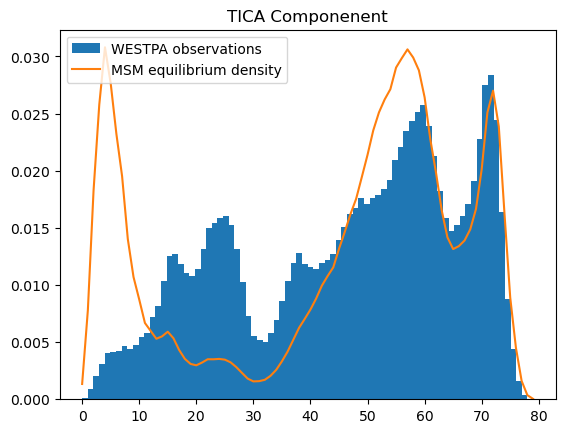

In [40]:
# Linear algebra by ChatGPT
# Solve for the stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(transition_prob_matrix.T)
stationary_vector = eigenvectors[:, np.isclose(eigenvalues, 1)]

assert stationary_vector.shape[1] == 1, "Stationary distribution is not unique"

# Normalize the stationary vector to sum to 1
stationary_distribution = stationary_vector / np.sum(stationary_vector)
stationary_distribution = stationary_distribution.real.flatten()

plt.title(f"TICA Componenent")
plt.hist(np.concatenate(binned_componenents), bins=num_bins, density=True, label="WESTPA observations")
plt.plot(stationary_distribution, label="MSM equilibrium density")
plt.legend()
pass

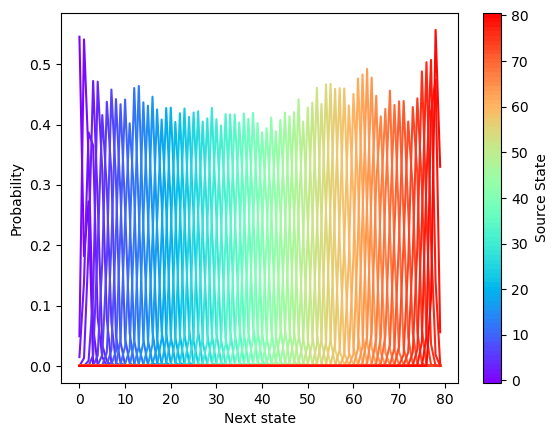

In [76]:
for i in range(len(transition_prob_matrix)):
    plt.plot(transition_prob_matrix[i].T, label=i, c=plt.colormaps["rainbow"](i/len(transition_prob_matrix)))
plt.ylabel("Probability")
plt.xlabel("Next state")
# plt.legend(title="Current State")

plt.colorbar(
    matplotlib.cm.ScalarMappable(cmap=plt.colormaps["rainbow"]),
    ax=plt.gca(), values=[*range(len(transition_prob_matrix)+1)],
    label="Source State")

# plt.colorbar(
#     matplotlib.cm.ScalarMappable(
#         norm = matplotlib.colors.BoundaryNorm([*range(len(transition_prob_matrix)+1)], plt.colormaps["rainbow"].N),
#         cmap=plt.colormaps["rainbow"]),
#     ax=plt.gca(), label="Source State")

pass

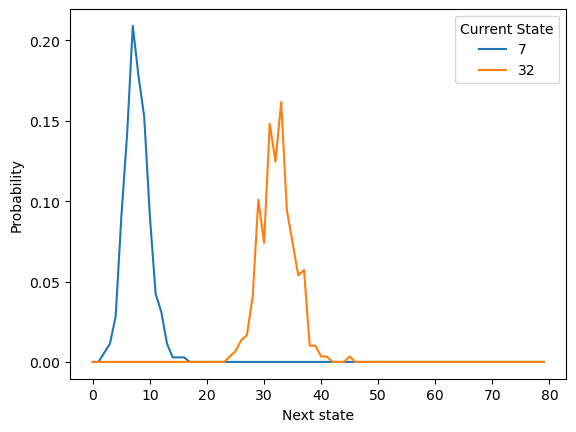

In [123]:
# Examining some individual bins

# for i in range(30,35):
for i in [7, 32]:
    plt.plot(transition_prob_matrix[i].T, label=i)
plt.ylabel("Probability")
plt.xlabel("Next state")
plt.legend(title="Current State")